# Setup

In [27]:
!pip install neo4j

     |████████████████████████████████| 71kB 2.7MB/s 
  Created wheel for neo4j: filename=neo4j-4.2.1-cp36-none-any.whl size=95190 sha256=06c31a03538da8b01d77d1d9f488e19414ab1a2142678faa0b6f351087287ece
  Stored in directory: /root/.cache/pip/wheels/00/a8/69/083e04c2ffc0a7e026c9356cd5bb54c65128f3e08ef8371be0
Successfully built neo4j


In [86]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
os.chdir('/content/drive/My Drive/College - 4th Year/CA4015_AdvancedML/Assignment_4') # Liam

# Load Data

In [13]:
user_friends = pd.read_csv("data/last.fm/user_friends.dat", delimiter="\t", header=0)
utag_artists = pd.read_csv("data/last.fm/user_taggedartists.dat", delimiter="\t", header=0)
user_artists = pd.read_csv("data/last.fm/user_artists.dat",delimiter="\t", header=0)

In [15]:
user_friends.head()

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831


# Constructing User Graph

The first step in building a graph model of the user network for this dataset is to build the different nodes and relationships which exist in the graph. Firstly, nodes for each of the users would need to constructed. Without the presence of a *user*, we need to extract the unique user ids from the various tables.

In [19]:
users1 = set(user_friends["userID"])
users2 = set(utag_artists["userID"])
users3 = set(user_artists["userID"])

users = users1.union(users2, users3)

In [21]:
len(users)

1892

In [26]:
df_user = pd.DataFrame(data=users)
df_user.columns = ["userID"]
df_user.head()

,userID
0,2
1,3
2,4
3,5
4,6


### Building graph

Building graph database of user network...

In [28]:
import networkx as nx

G = nx.Graph()

### Inserting nodes and relationships

Adding user nodes...

In [30]:
G.add_nodes_from(users)

Adding the 12k friendships from the *user_friends* table...

In [33]:
for rel in zip(user_friends["userID"], user_friends["friendID"]):
  G.add_edge(*rel)

Checking that we've constructed the graph correctly...

In [34]:
G.number_of_nodes()

1892

In [35]:
G.number_of_edges()

12717

### Graph visualisation

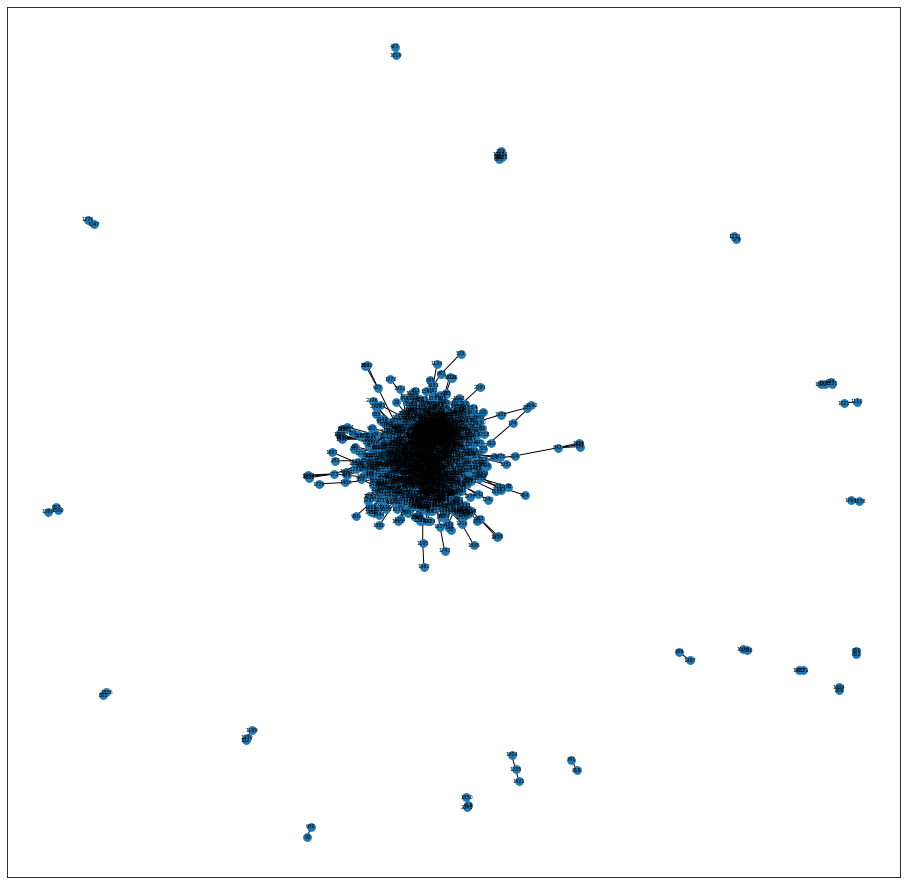

In [105]:
plt.figure(figsize=(16,16))
nx.draw_networkx(G, with_labels=True, node_size=60, font_size=5)

Due to the dense structure of the nodes in the centre of the graph, the different users cannot really be distinguished from this. However, we can see the many smaller communities which exist among the graph and the larger communtiy which also exists.

# Centrality Analysis

### Degree Centrality

We will explore the aforementioned communities later. Firstly, we are going to carry out some centrality analysis on the graph. Centrality algorithms identify the most important nodes within a graph.

The most simple centrality algorithm is degree centrality, which counts the number of in-links and out-links which a given node has. As our graph is undirected, degree centrality simply represents the number of friendships a certain user node has. The value itself is the fraction of the other nodes which the node is connected to.

In [48]:
deg_cent = nx.degree_centrality(G)

In [69]:
for i, (k, v) in enumerate(sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)):
  print(f"{i + 1}.", "User ID: ", k, "|", "Degree Centrality: ", v, "|", "Degree: ", G.degree(k))
  if i >= 9:
    break

1. User ID:  1543 | Degree Centrality:  0.06292966684294024 | Degree:  119
2. User ID:  1281 | Degree Centrality:  0.05817028027498678 | Degree:  110
3. User ID:  831 | Degree Centrality:  0.05605499735589635 | Degree:  106
4. User ID:  179 | Degree Centrality:  0.05129561078794289 | Degree:  97
5. User ID:  1503 | Degree Centrality:  0.05023796932839767 | Degree:  95
6. User ID:  1023 | Degree Centrality:  0.048122686409307246 | Degree:  91
7. User ID:  405 | Degree Centrality:  0.047593865679534636 | Degree:  90
8. User ID:  1895 | Degree Centrality:  0.047593865679534636 | Degree:  90
9. User ID:  1300 | Degree Centrality:  0.04706504494976203 | Degree:  89
10. User ID:  390 | Degree Centrality:  0.046536224219989424 | Degree:  88


The top 10 users based on their amount of friendships is shown above. The top user is friends with 119 other users!

### Betweeness Centrality

Betweeness is antoher centrality measure for nodes within a graph. Betweeness centrality quantifies the number of times a particular node acts as a bridge along the shortest path between two other nodes. In other words, it highlights *bridge nodes* in a graph. 

For instance, within our user graph, if a node existed which provided a link between a number of smaller communities of users and a bigger community of users, it would have high betweeness centrality. It will be interesting to see if the user who is friends with the most users also has the highest betweeness score.

In [63]:
bet_cent = nx.betweenness_centrality(G)

In [70]:
for i, (k, v) in enumerate(sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)):
  print(f"{i + 1}.", "User ID: ", k, "|", "Betweeness Centrality: ", v, "|",  "Degree: ", G.degree(k))
  if i >= 9:
    break

1. User ID:  1543 | Betweeness Centrality:  0.06652735710530977 | Degree:  119
2. User ID:  1281 | Betweeness Centrality:  0.05454857830063434 | Degree:  110
3. User ID:  831 | Betweeness Centrality:  0.0486909627192555 | Degree:  106
4. User ID:  1258 | Betweeness Centrality:  0.043025085275128785 | Degree:  86
5. User ID:  78 | Betweeness Centrality:  0.02933678308141875 | Degree:  81
6. User ID:  1213 | Betweeness Centrality:  0.02416713291715056 | Degree:  68
7. User ID:  1130 | Betweeness Centrality:  0.02379941702234762 | Degree:  57
8. User ID:  1503 | Betweeness Centrality:  0.023197150480945353 | Degree:  95
9. User ID:  298 | Betweeness Centrality:  0.02311287444872993 | Degree:  79
10. User ID:  1597 | Betweeness Centrality:  0.02175259253890188 | Degree:  70


The three users who had the highest number of friendships also have the highest betweeness centrality scores. This underscores the diversity of the friendships which they have but also may be an artefact of the little information which we have about the users. 

User 1130 must have friendships with users from a vast array of sub-communities given his high betweeness score and low amount of friendships compared to the other top scorers.

# Community Detection

In [71]:
from networkx.algorithms import community

Communities of node are said to be nodes which are densely connected internally. From the plot of our graph, we can see that there are a number of naturally occuring sub-communities which exist across our graph. We explore these communities below.

Below a dictionary of colors is defined for use in plotting.

In [88]:
from matplotlib import colors as mcolors
import random
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

### Clauset-Newman-Moore Greedy Modularity Maximization

Greedy modularity maximization begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists. Several sets of nodes are returned representing the different communities.

In [74]:
cnm_gmm = list(community.greedy_modularity_communities(G))

In [78]:
len(cnm_gmm)

42

There are 42 sub-communities present in our user community! Below, we create nodelists for each community for the sake of visualisation.

In [99]:
cnm_gmm_nodelists = []

for comm in cnm_gmm:
  cnm_gmm_nodelists.append(list(comm))

Visualising the communities...

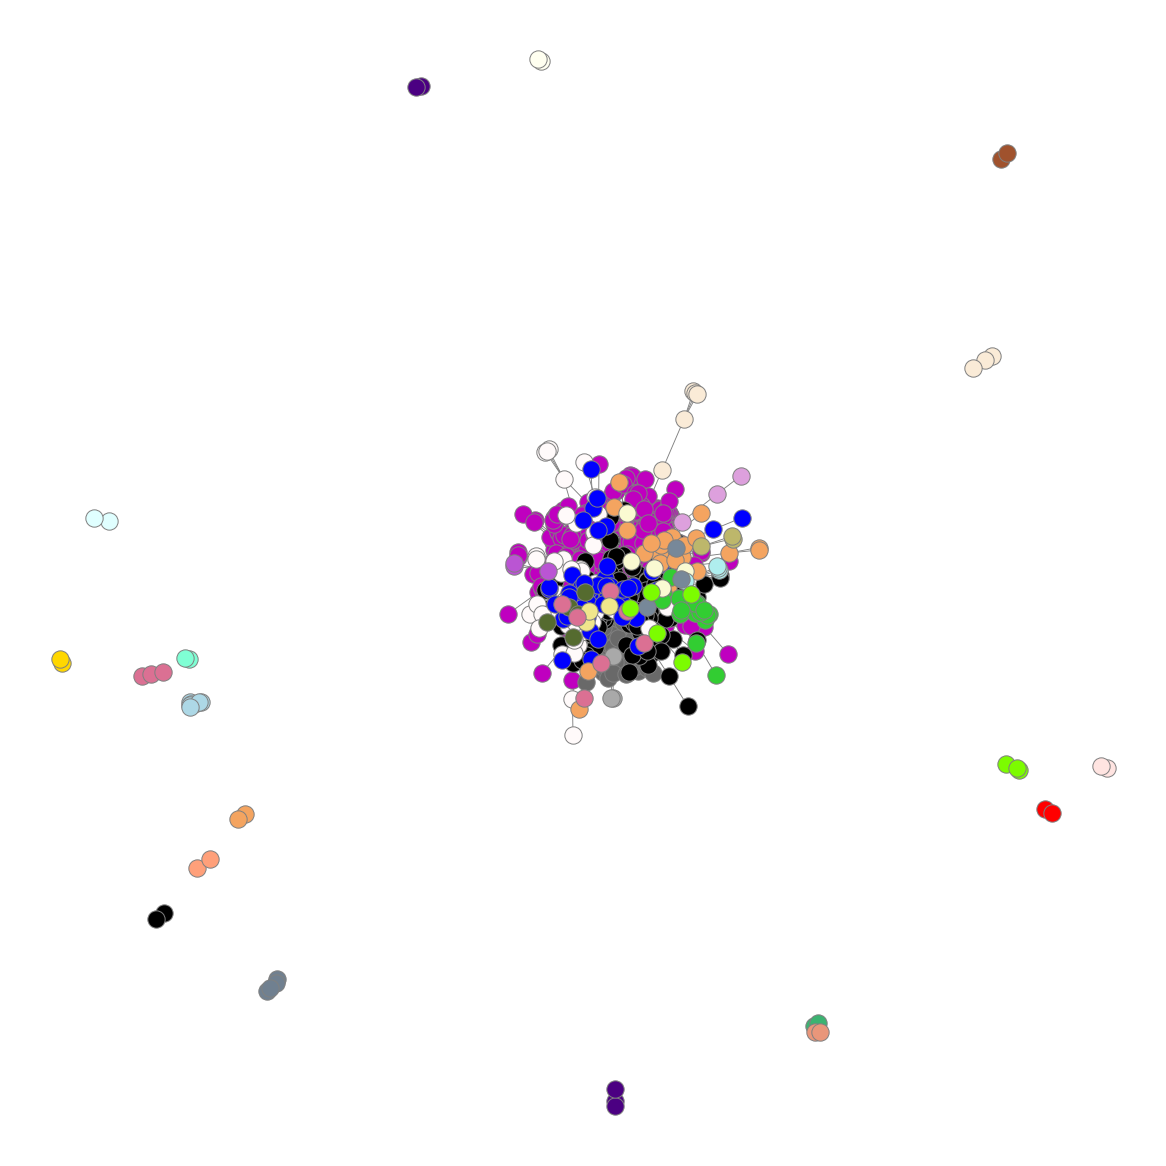

In [104]:
all_nodes = list(users)

#list of edges
elist = [rel for rel in zip(user_friends["userID"], user_friends["friendID"])]

#create the networkx Graph with node types and specifying edge distances
GC1 = nx.Graph()
for n in all_nodes:
    GC1.add_node(n)
for from_loc, to_loc in elist:
    GC1.add_edge(from_loc, to_loc)   

pos = nx.spring_layout(GC1) #calculate position for each node
# pos is needed because we are going to draw a few nodes at a time,
# pos fixes their positions.

plt.figure(figsize=(16,16))

# Draw the graph, but don't color the nodes
nx.draw(GC1, pos, edge_color='grey',  with_labels=False,
         font_weight='light', node_size= 70, width= 0.9)

#For each community list, draw the nodes, giving it a specific color
for comm in cnm_gmm_nodelists:
  nx.draw_networkx_nodes(GC1, pos, nodelist=comm, node_color=random.choice(list(colors.keys())), edgecolors="grey")

plt.show()

From the plot, we can see the different communities which exists throughout the user dataset. The smaller communities made up of only a few nodes can be see dotted around the edge of the graph.

It's clear that one bigger community exists in the user network but in this community, there are also smaller cliques of users dotted throughout!